# AB Testing of Cockie Cats Games data

## Background Information

userid: A unique number that identifies each player.

version: Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a)

sum_gamerounds: The number of game rounds played by the player during the first 14 days after install.

retention_1: Did the player come back and play 1 day after installing?

retention_7: Did the player come back and play 7 days after installing?

# Contents
1. Importing necessery libraries
2. Data exploration and transformation
3. Statistical Data Analysis
4. Data Visualization
5. A/B Testing implementation

# Importing Necessary Libraries

The analysis requires, file reading, math operations visualizing, and statistical analysis. For this we require pandas, numpy, stats model from scipy and visulaizing modules like matplotlib, searborn and plotly.  

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import MultiComparison

# Data exploration and Transformation

### Data Exploration

In [17]:
# Read the source file from the current directory
df=pd.read_csv('cookie_cats.csv')
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [18]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


### Summary:
The data exploration reveals that the working dataset is free of any null values and duplicated values. There are five columns. 
One object type, 2 int64 type, 2 bool data type. 
I will be changing the object type of the column data into a string type for easiler application of the functions and operations. Bool values will be converted to Int64 type by replacing true with 1 and false with 0. 

## Data Transformation

In [21]:
df['version']=df['version'].astype('string')
df.dtypes

userid             int64
version           string
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  string
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), string(1)
memory usage: 2.2 MB


### Summary:
The columns are transformed to the required data types and the values are also transformed according to the requirements. 

# Statistical Data Analysis

In [23]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


# Data Visualization
The above stats is based on inconsistent range of values which may contain outliers. I will visualize and find out the Quartile, interquartile range and also the outliers. The best suited graph for the job is a boxplot. I will be grouping the dataset based on the viersion of the game. 

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


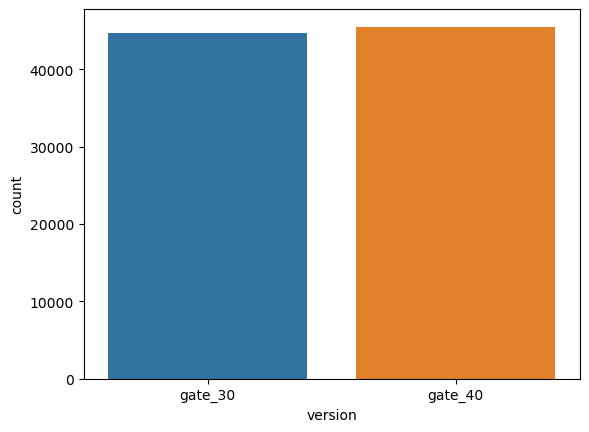

<Axes: >

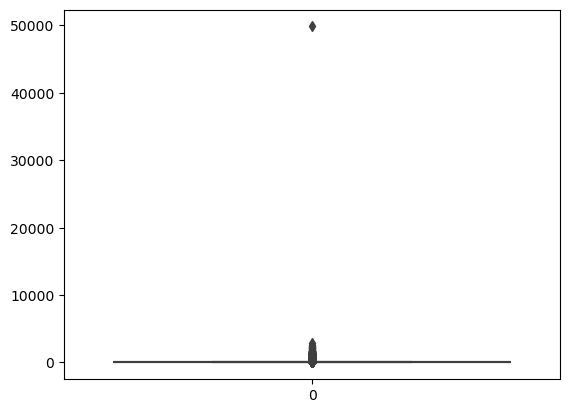

In [24]:
display(df.groupby('version').count())

sns.countplot(x='version', data=df)
plt.show()

sns.boxplot(df['sum_gamerounds'])

### Summary:
As seen from the second boxplot of the sum of the game rounds, there's an outlier value at around 50000. I will exclude this value and find the quartile, interquartile values and redefine the dataset for further reliable anaysis. 

In [25]:
Q25 = np.quantile(df['sum_gamerounds'],0.25)
Q75 = np.quantile(df['sum_gamerounds'],0.75)
Interquantile_Range = Q75 - Q25

Include_range = (max(min(df['sum_gamerounds']), Q25-1.5*Interquantile_Range),
                min(max(df['sum_gamerounds']), Q75+1.5*Interquantile_Range))

df_without_outlier = df[
    (df['sum_gamerounds'] > Include_range[0]) &
    (df['sum_gamerounds'] < Include_range[1])]
df_without_outlier

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
3,483,gate_40,1,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


<Axes: >

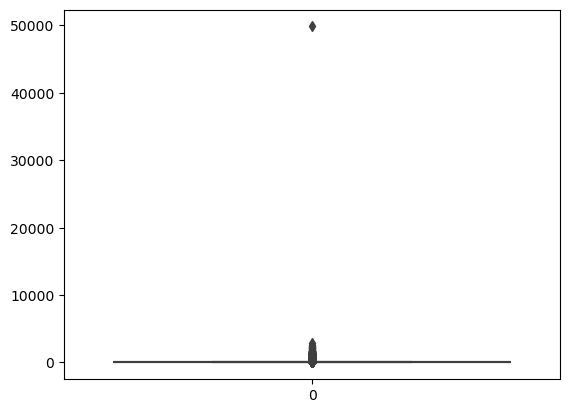

In [26]:
sns.boxplot(df['sum_gamerounds'])

<Axes: >

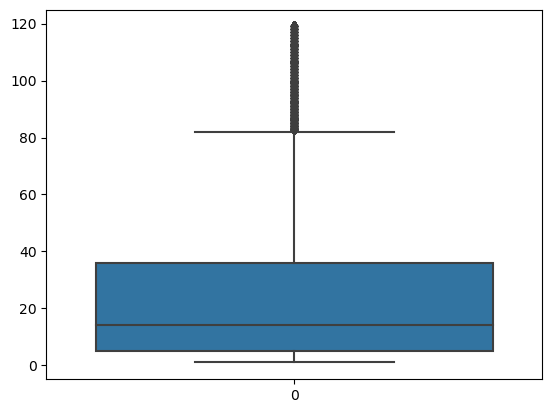

In [27]:
sns.boxplot(df_without_outlier['sum_gamerounds'])

Checking the histogram for better visualization


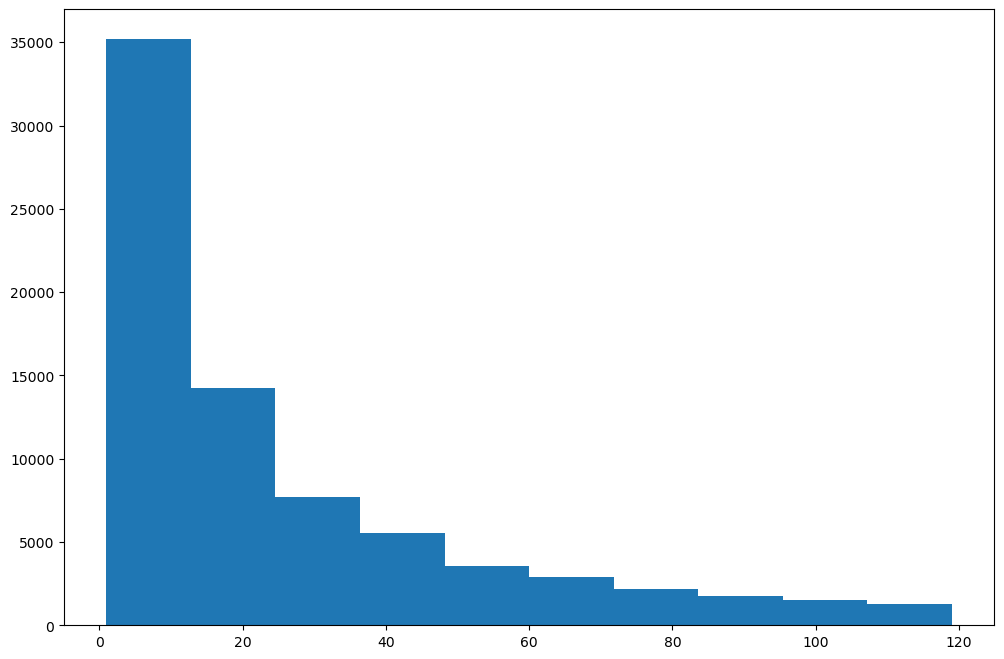

In [28]:
fig,ax=plt.subplots(figsize =(12,8))
ax.hist(df_without_outlier['sum_gamerounds'])
plt.show()

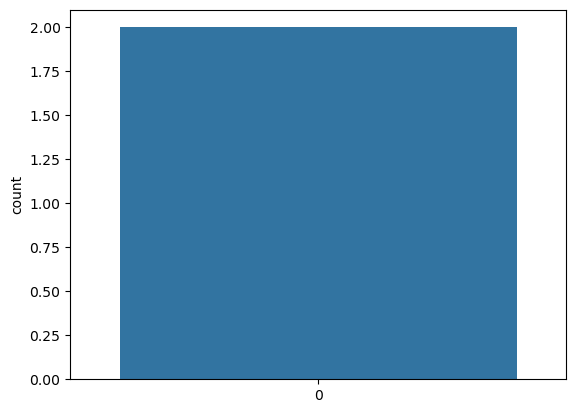

In [29]:
sns.countplot(df_without_outlier['retention_1'].value_counts());

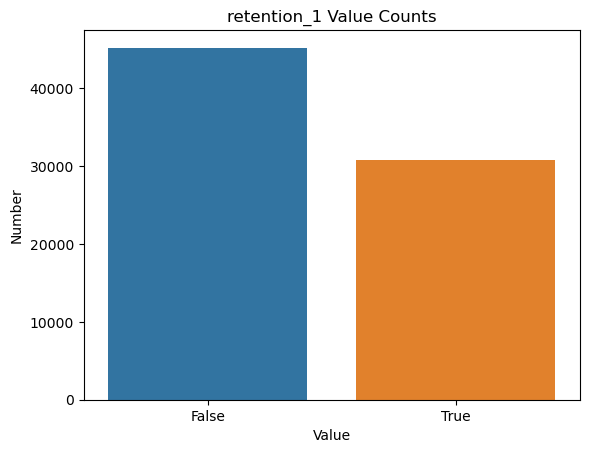

In [30]:
value_counts = df_without_outlier["retention_1"].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title("retention_1 Value Counts")
plt.xlabel("Value")
plt.ylabel("Number")
plt.show()

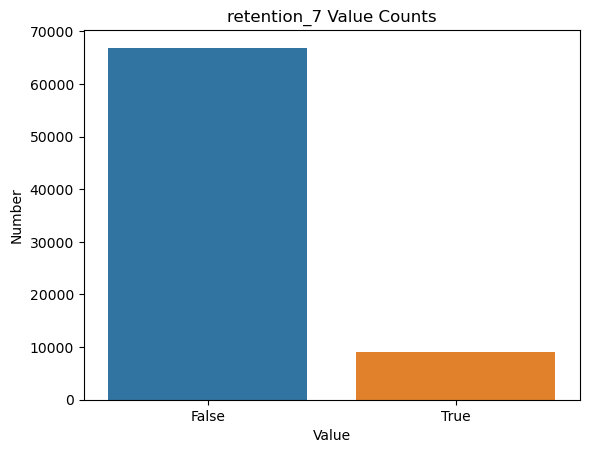

In [31]:
value_counts = df_without_outlier["retention_7"].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title("retention_7 Value Counts")
plt.xlabel("Value")
plt.ylabel("Number")
plt.show()

Checking the statistics based on the grouped values on the basis of game version, sum of game rounds, retention 1 and retention 7. I'll be taking the aggregated values of these features for grouping. 

In [32]:
df_without_outlier.groupby('version').agg({'sum_gamerounds':['count', 'mean', 'median', 'std', 'min', 'max'],
                                          'retention_1':['count', 'mean', 'median', 'std', 'min', 'max'],
                                           'retention_7':['count', 'mean', 'median', 'std', 'min', 'max'],
                                          })

sum_gamerounds                                       retention_1  \
                 count       mean median        std min  max       count   
version                                                                    
gate_30          37656  25.062115   14.0  27.097945   1  119       37656   
gate_40          38263  25.167995   14.0  27.752181   1  119       38263   

                                                retention_7                   \
             mean median       std    min   max       count      mean median   
version                                                                        
gate_30  0.407505    0.0  0.491377  False  True       37656  0.123300    0.0   
gate_40  0.402086    0.0  0.490325  False  True       38263  0.114549    0.0   

                                
              std    min   max  
version                         
gate_30  0.328786  False  True  
gate_40  0.318481  False  True

### Summary: 
Based on these numbers, there may not be a significant difference in the average game rounds played at Gate_30 and Gate_40. However, this difference could have occurred by chance and might need to be statistically tested.  

#### Step 1 - Formulate Hypotheses:
- Null Hypothesis (H0): μ1 = μ2 ("There is no statistically significant difference in the means of the number of game rounds played by players at Gate_30 and Gate_40.")

- Alternative Hypothesis (H1): μ1 ≠ μ2 ("There is a statistically significant difference in the means of the number of game rounds played by players at Gate_30 and Gate_40.")

#### Step 2 - Assumption Checks:
- Normality Assumption
- Homogeneity of Variance

#### Step 3 - Normality Assumption Hypothesis:
- H0: The normal distribution assumption is met.
- H1: The normal distribution assumption is not met.

#### Step 4 - Assumption of Homogeneity of Variance:
- H0: Variances are homogenous.
- H1: Variances are not homogenous.

#### Normality Assumption Check
p value is less than α value. H0 is rejected. The Normal Distribution assumption is not met.

I will be doing shapiro test in order to find out the assumption

In [34]:
test_stat, p_value = shapiro(df_without_outlier.loc[df_without_outlier['version']=='gate_30', 'sum_gamerounds'])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, p_value))

Test Stat = 0.8087, p-value = 0.0000


In [35]:
test_stat, p_value = shapiro(df_without_outlier.loc[df_without_outlier['version']=='gate_40', 'sum_gamerounds'])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, p_value))

Test Stat = 0.8003, p-value = 0.0000


The above obtained p values clearly tells that null hypothesis can be rejected as the normal distribution assumption that is p-value is greater than α. 

#### Variance Homogeneity Control
p-value = 0.0948 > alpha = 0.05. H0 is not rejected. Variances are homogenous. Homogeneity of variances is no longer important because the data does not follow a normal distribution. Therefore, we will apply a non-parametric test.

In [38]:
test_stat, p_value=levene(df_without_outlier.loc[df_without_outlier['version']=='gate_40', 'sum_gamerounds'],
                         df_without_outlier.loc[df_without_outlier['version']=='gate_40', 'sum_gamerounds'])
print('Test Stat = %.4f, p-value = %.4f'%(test_stat, p_value))

Test Stat = 0.0000, p-value = 1.0000


#### MannWhitneyU Test
p-value= 1 > α = 0.05 H0 is not rejected. There is no statistically significant difference in the number of game rounds played between the Gate_30 and Gate_40 versions.

In [39]:
test_stat, pvalue = mannwhitneyu(df_without_outlier.loc[df_without_outlier["version"] == "gate_30", "sum_gamerounds"], 
                           df_without_outlier.loc[df_without_outlier["version"] == "gate_40", "sum_gamerounds"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 725650246.5000, p-value = 0.0828


The version of the game is irrelavent. Its not producing correct test results. I will be removing it. 

In [40]:
df_without_outlier.drop('version', axis=1)

,userid,sum_gamerounds,retention_1,retention_7
0,116,3,False,False
1,337,38,True,False
3,483,1,False,False
7,1444,2,False,False
8,1574,108,True,True
...,...,...,...,...
90184,9999441,97,True,False
90185,9999479,30,False,False
90186,9999710,28,True,False
90187,9999768,51,True,False


For Further Analysis, I will convert the bool type columns into int64 type

In [42]:
df_without_outlier['retention_1']=df_without_outlier['retention_1'].astype(int)
df_without_outlier['retention_7']=df_without_outlier['retention_7'].astype(int)
df_without_outlier

C:\Users\DELL\AppData\Local\Temp\ipykernel_10152\2148409597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outlier['retention_1']=df_without_outlier['retention_1'].astype(int)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10152\2148409597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outlier['retention_7']=df_without_outlier['retention_7'].astype(int)


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
3,483,gate_40,1,0,0
7,1444,gate_40,2,0,0
8,1574,gate_40,108,1,1
...,...,...,...,...,...
90184,9999441,gate_40,97,1,0
90185,9999479,gate_40,30,0,0
90186,9999710,gate_30,28,1,0
90187,9999768,gate_40,51,1,0
